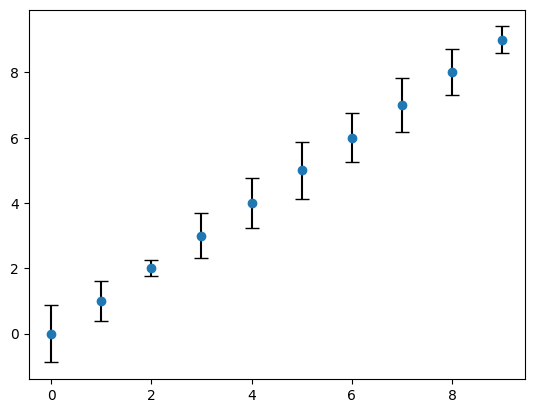

In [4]:
# エラーバー付き散布図の例
import matplotlib.pyplot as plt
import numpy as np

# データ
x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)
# エラーバー
y_error = np.random.rand(10)

# グラフの描画
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, ecolor='black')
plt.show()


In [2]:
import cdflib

cdfname = '../akebono_data/vlf/mca/h1/ave0.5s/1990/ak_h1_mca_19900201_v02.cdf'
xry = cdflib.cdf_to_xarray(cdfname)
xry

<xarray.Dataset>
Dimensions:  (Epoch: 172800, channel: 16)
Coordinates:
  * Epoch    (Epoch) float64 6.28e+13 6.28e+13 6.28e+13 ... 6.28e+13 6.28e+13
  * channel  (channel) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Data variables:
    Emax     (Epoch, channel) uint8 69 91 70 69 60 58 54 33 ... 0 0 0 0 0 0 0 0
    Eave     (Epoch, channel) uint8 88 97 92 87 78 67 61 49 ... 0 0 0 0 0 0 0 0
    Bmax     (Epoch, channel) uint8 126 114 107 99 94 108 104 ... 0 0 0 0 0 0 0
    Bave     (Epoch, channel) uint8 134 124 115 114 122 120 110 ... 0 0 0 0 0 0
    PostGap  (Epoch) uint32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 1
Attributes: (12/24)
    Acknowledgement:             AKEBONO VLF-MCA data were provided by Akebon...
    ADID_ref:                    NSSD0241 
    Data_type:                   H1 > High Resolution data
    Data_version:                2
    Descriptor:                  MCA > multi channel analyzer
    Discipline:                  Space Physics > Magnetospheric Science
    ...                          ...
    source_name:                 Akebono > Akebono satellite
    TEXT:                        Kimura, I., K. Hashimoto, I. Nagano, T. Okad...
    Time_resolution:             0.5s
    TITLE:                       Akebono MCA High resolution data
    Start_time:                  1990_02/01_0:0:0:0
    End_time:                    1990_02/01_23:59:59:999

In [1]:
import plasma_params as pp
import numpy as np

mo = pp.MO
mh = pp.MH
e = pp.Q
f = 562
wl_inv = 1e-5
theta = np.deg2rad(30)
omega_h = pp.omega_h['value']
omega_o = pp.omega_o['value']

In [3]:
pp.MO = 1.0
print(pp.MO)

1.0


In [31]:
n = 1
w = 2*np.pi*f
k = 2*np.pi*wl_inv
mo/e/2*((w - n*omega_o)/(k*np.cos(theta)))**2

339192919.0938472

In [7]:
import pytplot
from store_high_time_res_spectrum_data import store_mca_high_time_res_data  # noqa: E402

store_mca_high_time_res_data('1989-03-11', del_invalid_data=['off', 'sms', 'bit rate m', 'noisy'])

In [8]:
import akebono
akebono.orb(['1989-03-11', '1989-03-12'])

20-Nov-23 10:35:23: File is current: ../akebono_data/orbit/daily/198903/ED890311.txt


['akb_orb_geo',
 'akb_orb_gdlat',
 'akb_orb_gdlon',
 'akb_orb_inv',
 'akb_orb_fmlat',
 'akb_orb_mlat',
 'akb_orb_mlt',
 'akb_orb_alt',
 'akb_orb_gcalt',
 'akb_orb_gclat',
 'akb_orb_gclon',
 'akb_orb_bmdl_scaler']

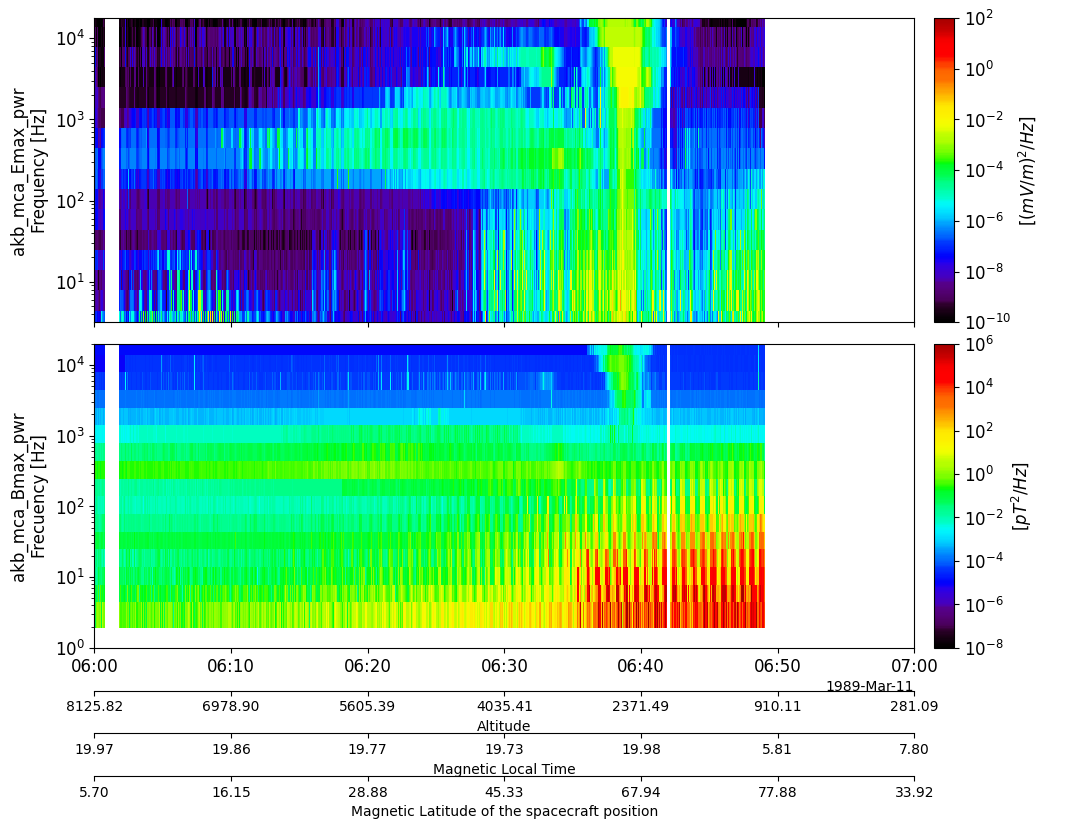

In [9]:
pytplot.tlimit(['1989-03-11 06:00:00', '1989-03-11 07:00:00'])
pytplot.options('akb_mca_Emax_pwr', 'spec', 1)
pytplot.tplot(['akb_mca_Emax_pwr', 'akb_mca_Bmax_pwr'],
              var_label=['akb_orb_alt', 'akb_orb_mlt', 'akb_orb_mlat'],
              xsize=10, ysize=10)

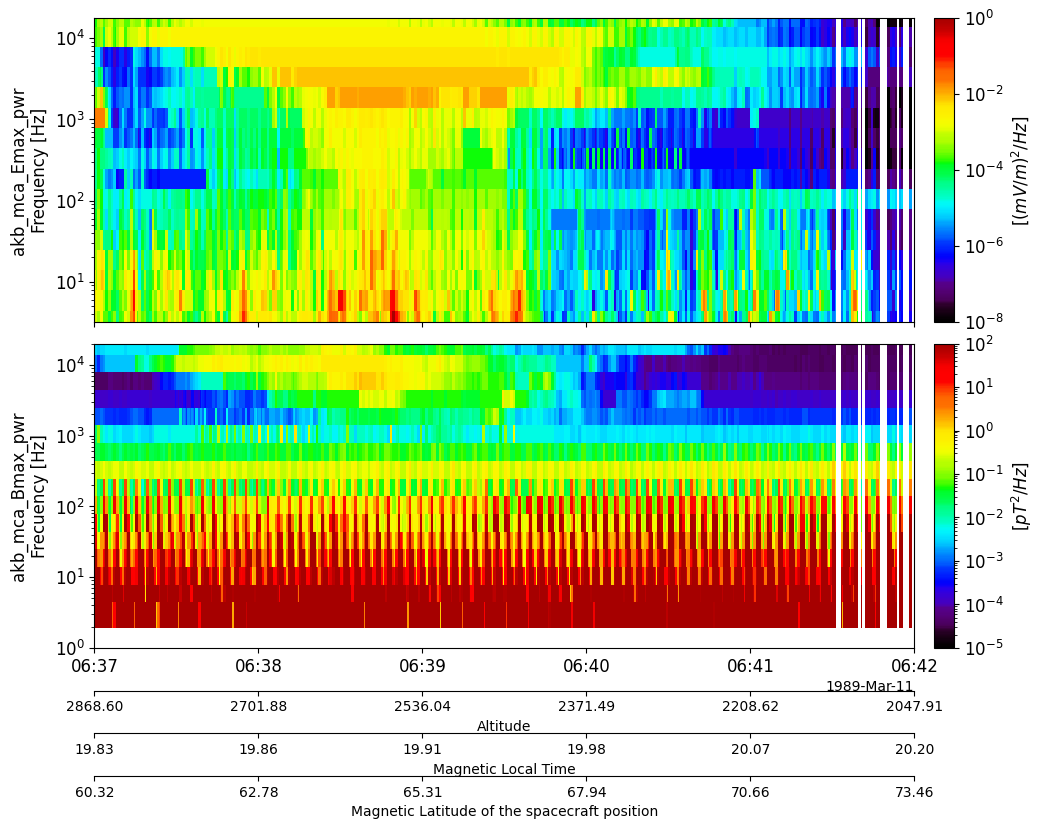

In [12]:
pytplot.tlimit(['1989-03-11 06:37:00', '1989-03-11 06:42:00'])
pytplot.options('akb_mca_Emax_pwr', 'zrange', [1e-8, 1])
pytplot.options('akb_mca_Bmax_pwr', 'zrange', [1e-5, 1e2])
pytplot.tplot(['akb_mca_Emax_pwr', 'akb_mca_Bmax_pwr'],
              var_label=['akb_orb_alt', 'akb_orb_mlt', 'akb_orb_mlat'],
              xsize=10, ysize=10)

In [ ]:
from plot_orb_ilat_mlt import plot_orb_ilat_mlt

plot_orb_ilat_mlt('1989-03-11 06:37:00', '1989-03-11 06:42:00')

In [3]:
from calc_pwr_matrix_angle_vs_freq import make_wave_mgf_dataset

ds = make_wave_mgf_dataset('1990-2-11', 'pwr')

In [4]:
ds

<xarray.Dataset>
Dimensions:           (Epoch: 168444, dim0: 3, channel: 16)
Coordinates:
  * Epoch             (Epoch) datetime64[ns] 1990-02-11T00:00:00.118000 ... 1...
  * channel           (channel) float32 3.16 5.62 10.0 ... 1e+04 1.78e+04
Dimensions without coordinates: dim0
Data variables:
    B0_spin           (Epoch, dim0) float64 nan nan nan ... 3.014e+03 1.345e+03
    angle_b0_Ey       (Epoch) float64 nan nan nan nan ... 26.37 -26.64 -40.63
    angle_b0_sBy      (Epoch) float64 nan nan nan nan ... -129.5 -146.9 -155.9
    angle_b0_Bloop    (Epoch) float64 nan nan nan nan ... 131.4 124.9 112.0
    akb_mca_Emax_pwr  (Epoch, channel) float64 nan nan nan nan ... nan nan nan
    akb_mca_Bmax_pwr  (Epoch, channel) float64 nan nan nan nan ... nan nan nan
Attributes: (12/14)
    CATDESC:        Magnetic field
    DEPEND_0:       Epoch
    DICT_KEY:       MAGNETIC_FIELD > amplitude
    DISPLAY_TYPE:   time_series
    FIELDNAM:       Magnetic field
    FILLVAL:        [-1.e+31]
    ...             ...
    UNITS:          T
    VALIDMAX:       [0.01]
    VALIDMIN:       [-0.01]
    VAR_TYPE:       data
    standard_name:  Magnetic field
    units:          T

In [5]:
subDs = ds.sel(Epoch=slice('1990-2-11 18:05:00', '1990-2-11 18:10:00'))
subDs


<xarray.Dataset>
Dimensions:           (Epoch: 602, dim0: 3, channel: 16)
Coordinates:
  * Epoch             (Epoch) datetime64[ns] 1990-02-11T18:05:00.239000 ... 1...
  * channel           (channel) float32 3.16 5.62 10.0 ... 1e+04 1.78e+04
Dimensions without coordinates: dim0
Data variables:
    B0_spin           (Epoch, dim0) float64 6.488e+03 -3.497e+03 ... -3.147e+03
    angle_b0_Ey       (Epoch) float64 -137.9 -145.9 142.2 ... 143.7 125.9 106.1
    angle_b0_sBy      (Epoch) float64 66.79 49.92 37.32 ... 25.24 -28.27 -43.46
    angle_b0_Bloop    (Epoch) float64 58.86 -58.97 -66.24 ... -79.97 -97.98
    akb_mca_Emax_pwr  (Epoch, channel) float64 0.2512 0.631 0.03162 ... nan nan
    akb_mca_Bmax_pwr  (Epoch, channel) float64 199.5 15.85 2.512 ... nan nan nan
Attributes: (12/14)
    CATDESC:        Magnetic field
    DEPEND_0:       Epoch
    DICT_KEY:       MAGNETIC_FIELD > amplitude
    DISPLAY_TYPE:   time_series
    FIELDNAM:       Magnetic field
    FILLVAL:        [-1.e+31]
    ...             ...
    UNITS:          T
    VALIDMAX:       [0.01]
    VALIDMIN:       [-0.01]
    VAR_TYPE:       data
    standard_name:  Magnetic field
    units:          T

In [14]:
import matplotlib.pyplot as plt

time = subDs['Epoch'].values
angle = subDs['angle_b0_Ey'].values
Epwr = subDs['akb_mca_Emax_pwr'].values
EpwrCh1 = Epwr[:, 0]

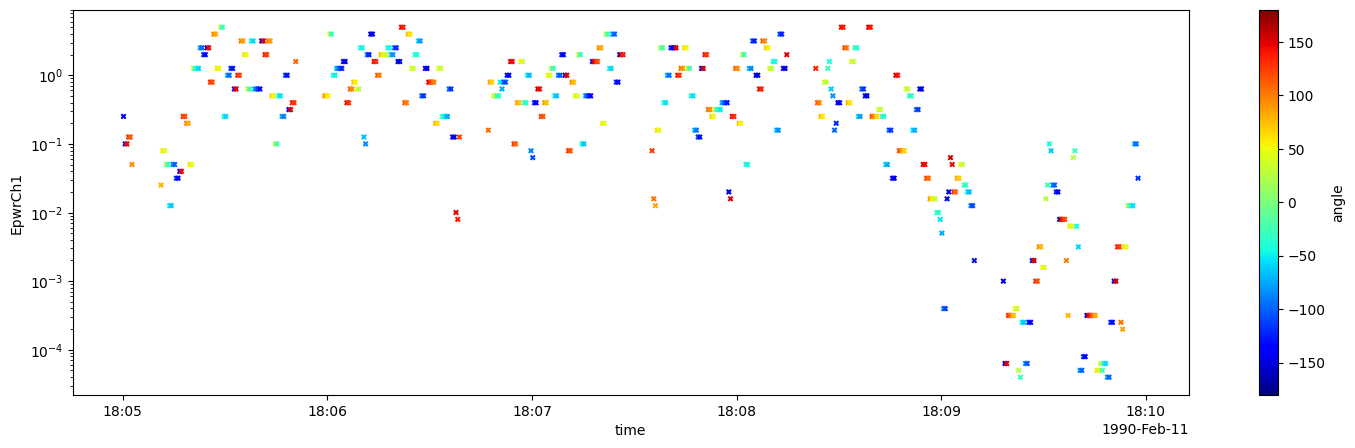

In [19]:
plt.figure(figsize=(18, 5))
plt.scatter(time, EpwrCh1, cmap='jet', c=angle, s=10, marker='x')
plt.colorbar(label='angle')
plt.clim(-180, 180)
plt.xlabel('time')
plt.ylabel('EpwrCh1')
plt.yscale('log')
plt.show()

In [23]:
a = []
b = [[1, 2, 3], [4, 5, 6]]
a.append(b)
a.append(b)
a[0][0]

[1, 2, 3]

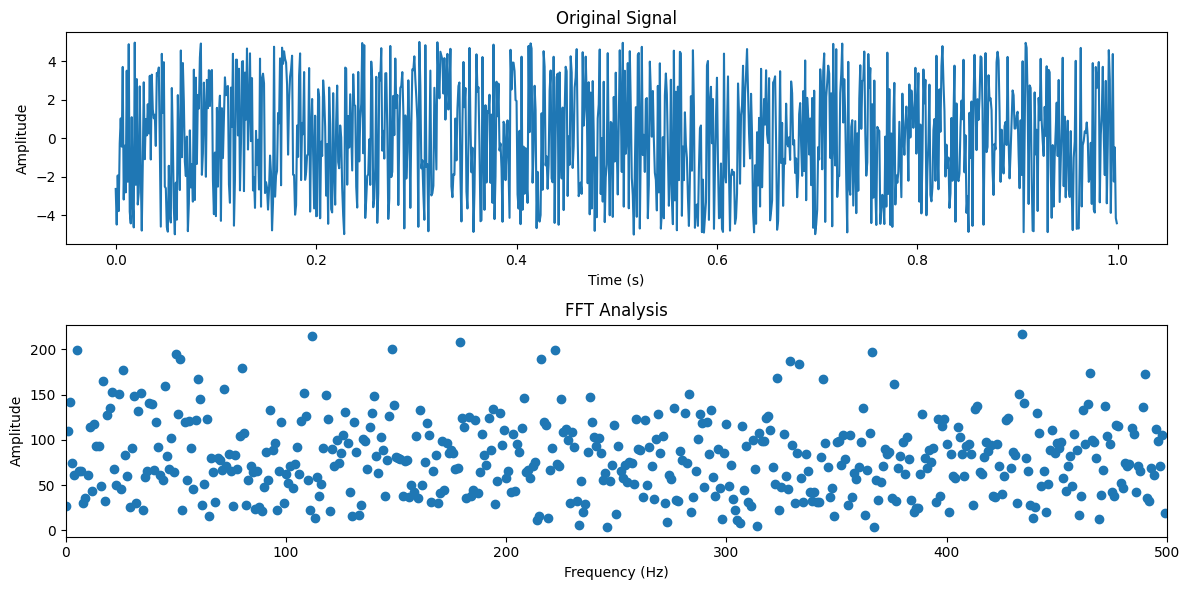

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the sine wave
sampling_rate = 1000  # Sampling rate in Hz
duration = 1.0        # Duration of the signal in seconds
frequency = 5.0       # Frequency of the sine wave in Hz

# Generate a time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the sine wave signal
signal = 10*(np.random.rand(len(t)) - 0.5)
signal_saturated = np.where(signal > 0.0, 1.0, -1.0)
# Perform FFT
fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the FFT result
plt.subplot(2, 1, 2)
plt.plot(fft_freqs, np.abs(fft_result), marker='o', linestyle='')
plt.title("FFT Analysis")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 500)

# Show the plots
plt.tight_layout()
plt.show()


In [18]:
import cdflib

xry = cdflib.cdf_to_xarray(cdfName)


ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable E_axis, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Mode, but the dimensions do not match.


In [19]:
xry


<xarray.Dataset>
Dimensions:           (Epoch_wav_narrow: 4450080, record0: 168386, Epoch: 172800)
Coordinates:
  * Epoch             (Epoch) float64 -1e+30 6.28e+13 ... 6.28e+13 6.28e+13
  * Epoch_wav_narrow  (Epoch_wav_narrow) float64 6.28e+13 6.28e+13 ... 6.28e+13
Dimensions without coordinates: record0
Data variables:
    dE_wav_narrow     (Epoch_wav_narrow) float32 -298.3 397.7 ... -2.97 -2.026
    dBx_wav_narrow    (Epoch_wav_narrow) float32 99.23 72.17 ... 0.0842 -0.8379
    dBy_wav_narrow    (Epoch_wav_narrow) float32 328.1 296.9 ... -0.531 -1.093
    dBz_wav_narrow    (Epoch_wav_narrow) float32 51.03 -6.379 ... 0.01705 -1.187
    E_axis            (record0) <U1 ' ' ' ' ' ' ' ' ' ' ... 'x' 'x' 'x' 'x' 'E'
    Mode              (record0) <U1 ' ' ' ' ' ' ' ' ' ' ... 'n' 'n' 'n' 'n' 'n'
    PostGap           (Epoch) uint32 4294967294 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
Attributes: (12/24)
    Acknowledgement:             AKEBONO VLF-ELF data were provided by Akebon...
    ADID_ref:                    NSSD0241 
    Data_type:                   H1 > High Resolution data
    Data_version:                3
    Descriptor:                  ELF > ELF Receiver
    Discipline:                  Space Physics > Magnetospheric Science
    ...                          ...
    source_name:                 Akebono > Akebono satellite
    TEXT:                        Kimura, I., K. Hashimoto, I. Nagano, T. Okad...
    Time_resolution:             160Hz
    TITLE:                       Akebono ELF High resolution data
    Start_time:                  1990_02/11_0:0:0:0
    End_time:                    1990_02/11_23:59:59:999

In [11]:
from preprocess_elf import store_elf

cdfName = '../akebono_data/vlf/elf/waveform/ak_h1_elf_19900211_v03.cdf'
store_elf(cdfName)


ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable E_axis, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Mode, but the dimensions do not match.


In [12]:
import pytplot
pytplot.tplot_names()


0 : E_waveform
1 : Bx_waveform
2 : By_waveform
3 : Bz_waveform


['E_waveform', 'Bx_waveform', 'By_waveform', 'Bz_waveform']

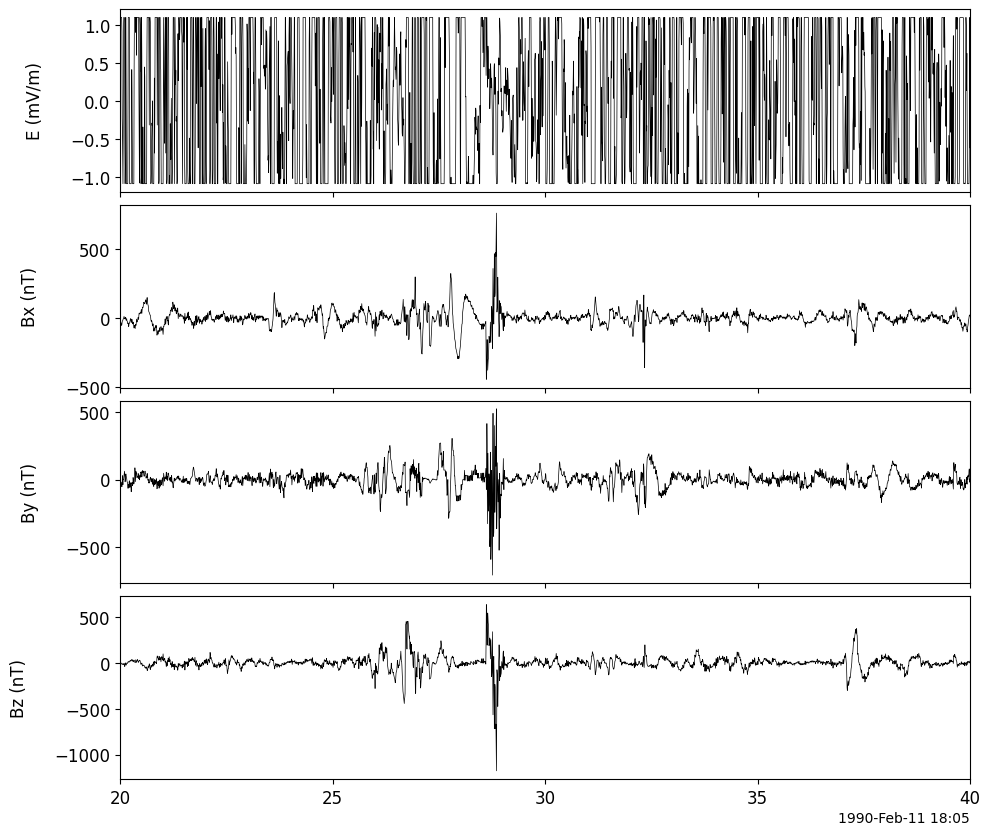

In [25]:
pytplot.tlimit(['1990-2-11 18:05:20', '1990-2-11 18:05:40'])
pytplot.tplot(['E_waveform', 'Bx_waveform', 'By_waveform', 'Bz_waveform'],
              xsize=10, ysize=10)


In [26]:
import akebono
import pytplot
from store_high_time_res_spectrum_data import store_mca_high_time_res_data

dateRange = ['1990-2-11', '1990-2-12']
store_mca_high_time_res_data(dateRange[0], 'pwr',
                             ['off', 'noisy'])


In [28]:
pytplot.tplot_names(quiet=True)


['E_waveform',
 'Bx_waveform',
 'By_waveform',
 'Bz_waveform',
 'akb_mca_Emax',
 'akb_mca_Eave',
 'akb_mca_Bmax',
 'akb_mca_Bave',
 'akb_mca_PostGap',
 'akb_mca_Emax_pwr',
 'akb_mca_Eave_pwr',
 'akb_mca_Bmax_pwr',
 'akb_mca_Bave_pwr']

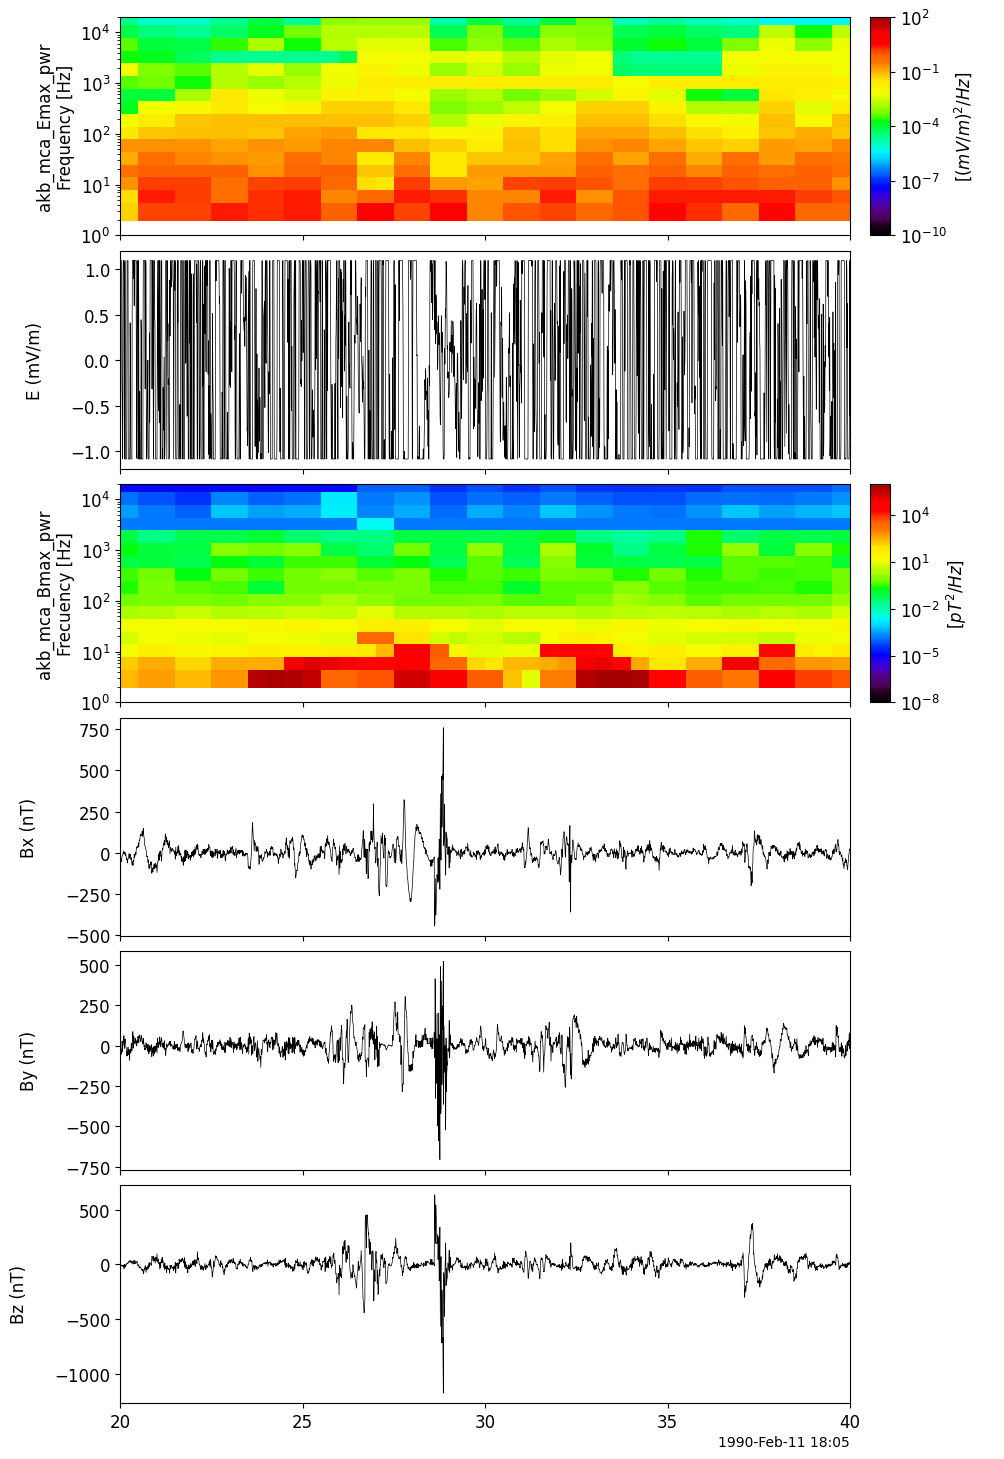

In [32]:
pytplot.tlimit(['1990-2-11 18:05:20', '1990-2-11 18:05:40'])
pytplot.tplot(['akb_mca_Emax_pwr', 'E_waveform', 'akb_mca_Bmax_pwr', 'Bx_waveform', 'By_waveform', 'Bz_waveform'],
              xsize=10, ysize=18)


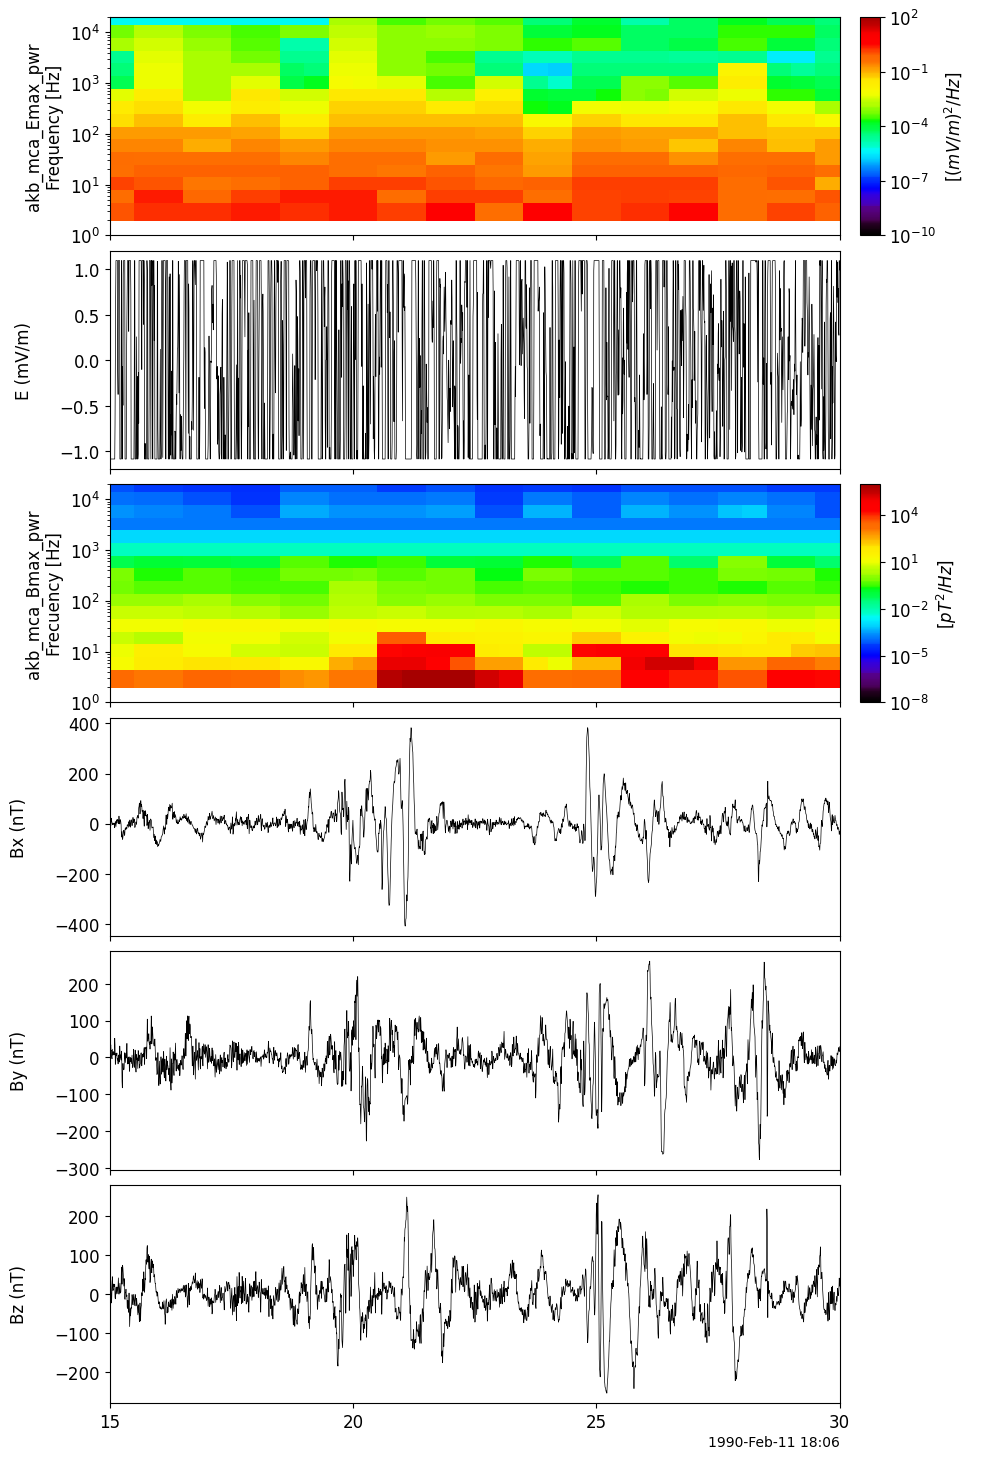

In [34]:
pytplot.tlimit(['1990-2-11 18:06:15', '1990-2-11 18:06:30'])
pytplot.tplot(['akb_mca_Emax_pwr', 'E_waveform', 'akb_mca_Bmax_pwr', 'Bx_waveform', 'By_waveform', 'Bz_waveform'],
              xsize=10, ysize=18)


In [38]:
import cdflib

cdfName = '../akebono_data/vlf/elf/spectrum/ak_h1_elf_19900211_v01.cdf'
xry = cdflib.cdf_to_xarray(cdfName)
xry


ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable E, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable B, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable By_narrow, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Bz_narrow, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable E_axis, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Mode, but the dimensions do not match.


<xarray.Dataset>
Dimensions:    (record0: 10524, dim0: 128, dim1: 64, record1: 10525,
                Epoch: 10800)
Coordinates:
  * Epoch      (Epoch) float64 6.28e+13 6.28e+13 6.28e+13 ... 6.28e+13 6.28e+13
Dimensions without coordinates: record0, dim0, dim1, record1
Data variables:
    E          (record0, dim0) uint8 254 254 254 254 254 254 254 ... 0 0 0 0 0 0
    B          (record0, dim0) uint8 254 254 254 254 254 254 254 ... 0 0 0 0 0 0
    By_narrow  (record0, dim1) uint8 254 254 254 254 254 ... 113 111 111 113 113
    Bz_narrow  (record0, dim1) uint8 254 254 254 254 254 ... 99 101 98 99 101
    E_axis     (record1) <U1 ' ' ' ' ' ' ' ' ' ' ' ' ... 'x' 'x' 'x' 'x' 'x' 'E'
    Mode       (record0) <U1 ' ' ' ' ' ' ' ' ' ' ' ' ... 'n' 'n' 'n' 'n' 'n' 'n'
    PostGap    (Epoch) uint32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    Frequency  (dim0) float32 1.0 2.25 3.5 4.75 6.0 ... 156.0 157.2 158.5 159.8
Attributes: (12/24)
    Acknowledgement:             AKEBONO VLF-ELF data were provided by Akebon...
    ADID_ref:                    NSSD0241 
    Data_type:                   H1 > High Resolution data
    Data_version:                1
    Descriptor:                  ELF > ELF Receiver
    Discipline:                  Space Physics > Magnetospheric Science
    ...                          ...
    source_name:                 Akebono > Akebono satellite
    TEXT:                        Kimura, I., K. Hashimoto, I. Nagano, T. Okad...
    Time_resolution:             s
    TITLE:                       Akebono ELF High resolution data
    Start_time:                  1990_02/11_0:0:0:0
    End_time:                    1990_02/11_23:59:59:999

In [39]:
Ewide = xry['E'].values
Bwide = xry['B'].values
freq = xry['Frequency'].values
time = xry['Epoch'].values[:10524]


In [41]:
from preprocess_mgf_epoch import convert_epoch
timeConverted = convert_epoch(time)


In [46]:
from akebono import dB_to_absolute

EwidePwr = dB_to_absolute(Ewide.astype(float), 1e-12)
BwidePwr = dB_to_absolute(Bwide.astype(float), 1e-12)


In [47]:
import pytplot

pytplot.store_data('Ewide', data={'x': timeConverted, 'y': EwidePwr, 'v':freq})
pytplot.store_data('Bwide', data={'x': timeConverted, 'y': BwidePwr, 'v':freq})


True

In [54]:
import akebono
akebono.vlf_mca(['1990-2-11', '1990-2-12'], 'pwr', ['off', 'noisy'])


04-Oct-23 19:07:22: Local file: ../akebono_data/vlf/mca/h1/ave8s/1990/ak_h1_mca_19900211_v02.cdf exists.


['akb_mca_Emax_pwr',
 'akb_mca_Bmax_pwr',
 'akb_mca_Eave_pwr',
 'akb_mca_Bave_pwr']

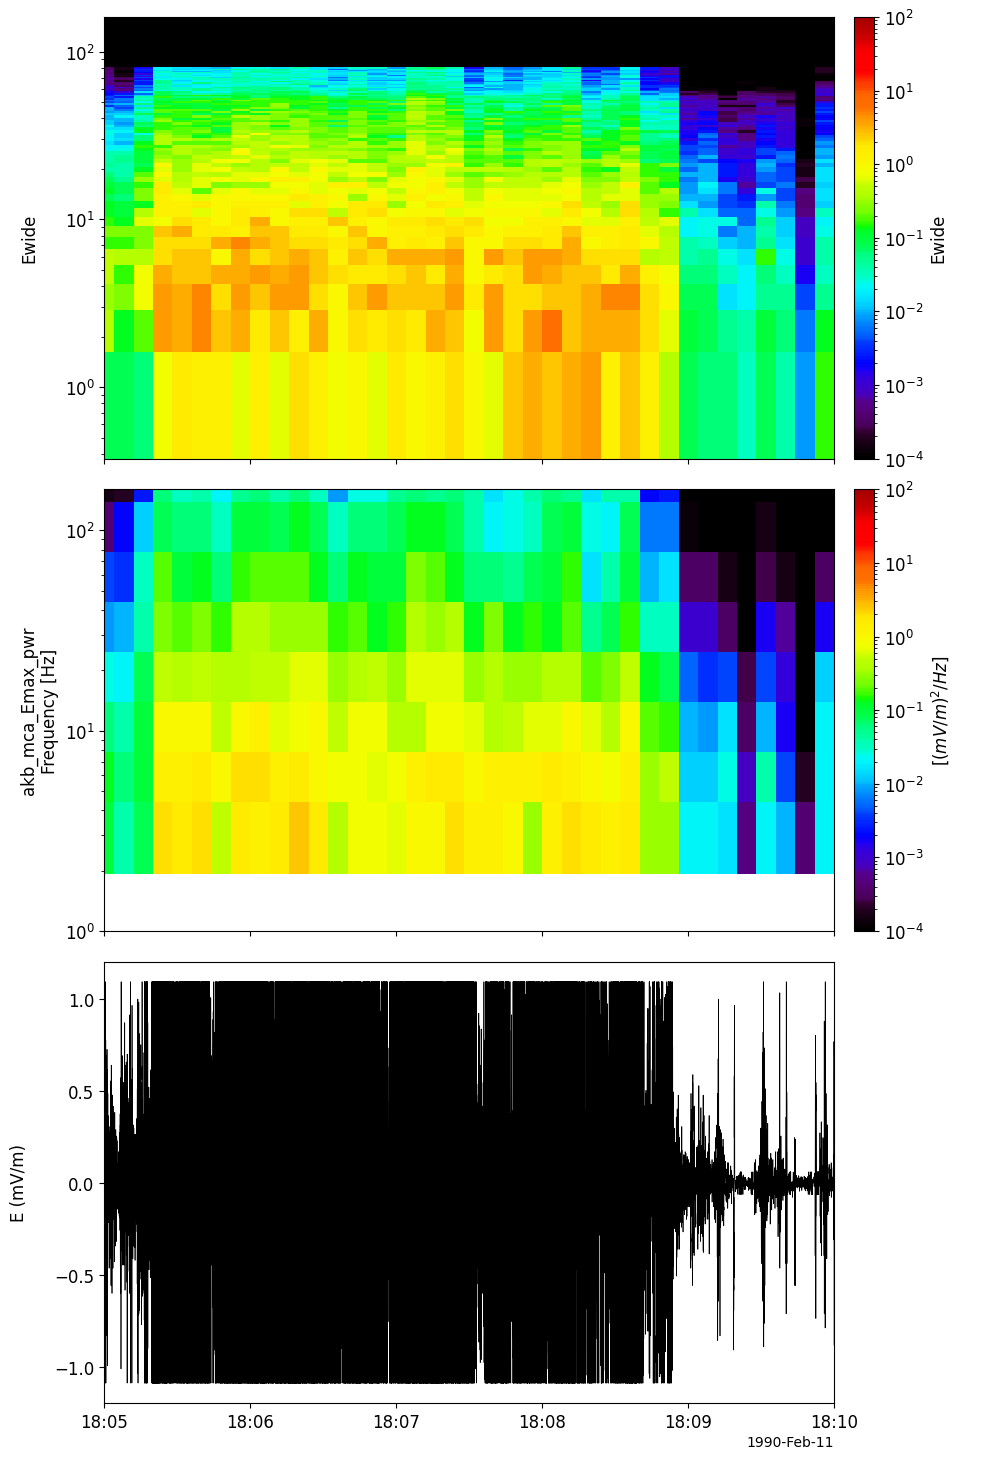

In [55]:
pytplot.options('Ewide', opt_dict={'spec': 1, 'ylog':1, 'zlog':1, 'zrange':[1e-4, 1e2]})
pytplot.options('Bwide', opt_dict={'spec': 1, 'ylog':1, 'zlog':1, 'zrange':[1e-2, 1e6]})
pytplot.options('akb_mca_Emax_pwr', opt_dict={'yrange':[1, 160], 'zrange':[1e-4, 1e2]})
pytplot.options('akb_mca_Bmax_pwr', opt_dict={'yrange':[1, 160], 'zrange':[1e-2, 1e6]})
pytplot.tlimit(['1990-2-11 18:05:00', '1990-2-11 18:10:00'])
pytplot.tplot(['Ewide', 'akb_mca_Emax_pwr', 'E_waveform'],
                xsize=10, ysize=18)


In [6]:
import cdflib
import pytplot

pytplot.cdf_to_tplot('../akebono_data/pws/NPW-DS/1990/ak_h1_pws_19900211_v01.cdf')


['Mode', 'Gain', 'RX1', 'RX2']

In [7]:
pytplot.options(['RX1', 'RX2'], 'spec', 1)


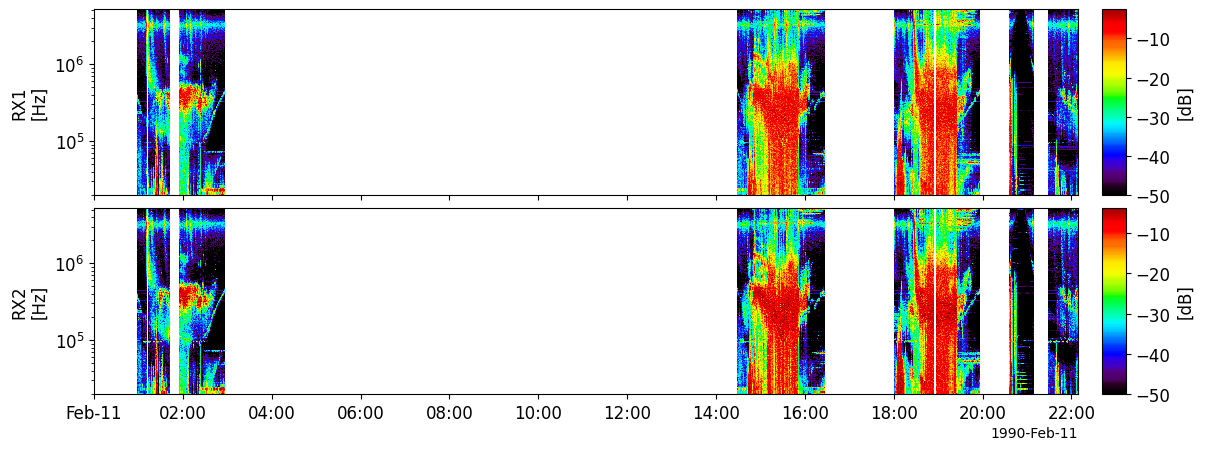

In [9]:
pytplot.tlimit(['1990-2-11 00:00:00', '1990-2-11 22:09:00'])
pytplot.tplot(['RX1', 'RX2'])


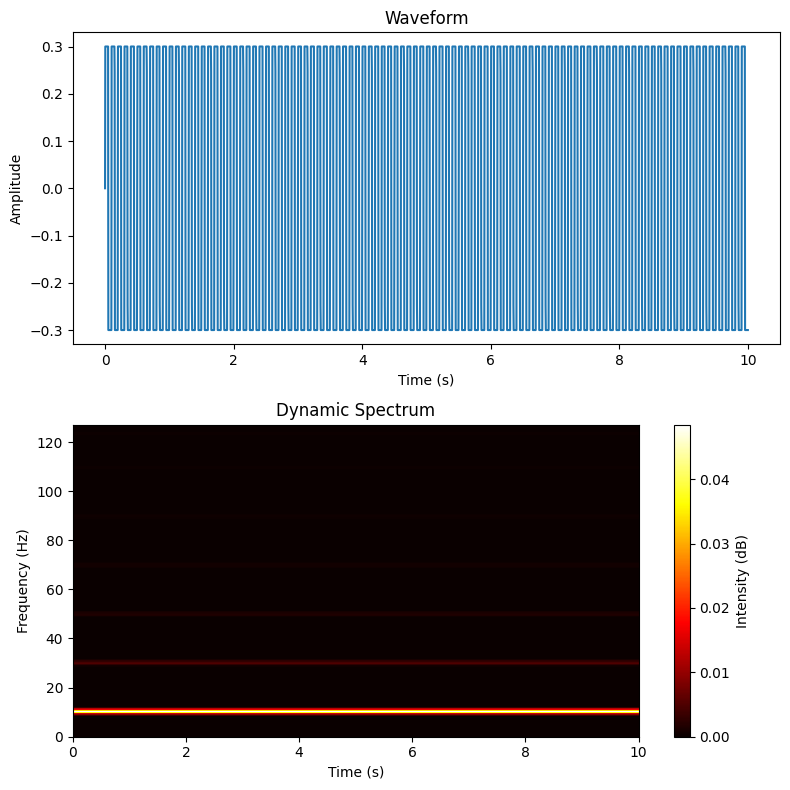

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
sampling_rate = 254  # サンプリングレート (1秒間に254点)
duration = 10  # 測定時間 (10秒)

# 時間軸の作成
time = np.arange(0, duration, 1/sampling_rate)

# 模擬波形の作成 単位はmV/m
amplitude = 10 * np.sin(2 * np.pi * 10 * time)

saturation_value = 0.3
amplitude[amplitude > saturation_value] = saturation_value
amplitude[amplitude < -saturation_value] = -saturation_value
# ダイナミックスペクトラムの作成
spectrogram, freqs, _, _ = plt.specgram(amplitude, Fs=sampling_rate, NFFT=256, noverlap=128)
plt.close()
# プロットの作成
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# 波形のプロット
axes[0].plot(time, amplitude)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Waveform')

# ダイナミックスペクトラムのプロット
axes[1].imshow(spectrogram, aspect='auto', cmap='hot', origin='lower', extent=[0, duration, freqs[0], freqs[-1]])
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Frequency (Hz)')
axes[1].set_title('Dynamic Spectrum')
# colorbarの追加
cbar = plt.colorbar(axes[1].images[0], ax=axes[1])
cbar.set_label('Intensity (dB)')
plt.tight_layout()
plt.show()



In [3]:
from numpy import linalg as LNG
import numpy as np

# creating an array using arrange function
# -3, -2, -1, 0, 1, 2, 3, 4, 5
a = np.arange(9) - 4
# converting the array into a matrix of 3x3
a = a.reshape((3,3))
# Printing matrix
print(a)

# computing norm for a matrix
print(LNG.norm(a))

# computing vector norms
print(LNG.norm(a, axis=0))


[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]
7.745966692414834
[4.58257569 4.24264069 4.58257569]


In [4]:
3*2**0.5


4.242640687119286

geopack practice

In [4]:
import datetime
import numpy as np

to = datetime.datetime(1970,1,1)
t2 = datetime.datetime(1970,1,2)
t1 = datetime.datetime(1970,1,3)
().total_seconds()


86400.0

In [1]:
import datetime

t1 = datetime.datetime(1990, 2,11, 18,0,0)
t0 = datetime.datetime(1970, 1,1)
ut = (t1-t0).total_seconds()


In [2]:
import matplotlib.pyplot as plt
from geopack import geopack
from matplotlib.patches import Wedge, Circle

def dual_half_circle(center=(0,0), radius=1, angle=90, ax=None, colors=('w','k','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = plt.gca()
    theta1, theta2 = angle, angle + 180
    #w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    #w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)

    w1 = Wedge(center, radius, theta1, theta2, fc=colors[1], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[0], **kwargs)

    cr = Circle(center, radius, fc=colors[2], fill=False, **kwargs)
    for wedge in [w1, w2, cr]:
        ax.add_artist(wedge)
    return [w1, w2, cr]

def setup_fig(xlim=(10,-30),ylim=(-20,20),xlabel='X GSM [Re]',ylabel='Z GSM [Re]'):

    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(111)
    ax.axvline(0,ls=':',color='k')
    ax.axhline(0,ls=':',color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.set_aspect('equal')
    w1,w2,cr = dual_half_circle(ax=ax)

    return ax

psi = geopack.recalc(ut)
x_gsm, y_gsm, z_gsm = 4, 3, 0


Load IGRF coefficients ...


In [3]:
x1gsm, y1gsm, z1gsm, xx, yy, zz= geopack.trace(x_gsm, y_gsm, z_gsm, dir = 1, rlim = 100, r0 = 1,
                                    inname='igrf')


In [5]:
print(x1gsm)
print(y1gsm)
print(z1gsm)
print(xx)
print(yy)
print(zz)


0.3721335450229651
0.18546748986996256
-0.9071450005789005
[4.         3.90358336 3.70370156 3.42413407 3.08835042 2.71643155
 2.32470849 1.92641763 1.58467256 1.30902507 1.08979625 0.9167566
 0.78065234 0.67369237 0.58956844 0.52328621 0.4709405  0.42949573
 0.39659619 0.38998968 0.38372237 0.37777605 0.37213355]
[3.         2.9174445  2.75627536 2.53599385 2.27533104 1.9898275
 1.69166979 1.39031928 1.13250203 0.92443948 0.75829665 0.6261439
 0.5209842  0.43704705 0.36975609 0.31556418 0.27175027 0.23622536
 0.20736998 0.2014951  0.19589491 0.19055647 0.18546749]
[ 0.         -0.48172171 -0.90900409 -1.25848294 -1.51995859 -1.69144724
 -1.77524828 -1.77543332 -1.71147858 -1.61570169 -1.50902402 -1.40355249
 -1.3057099  -1.21839046 -1.14239005 -1.07733252 -1.02225534 -0.97596705
 -0.93725262 -0.92924079 -0.92156067 -0.91419953 -0.907145  ]


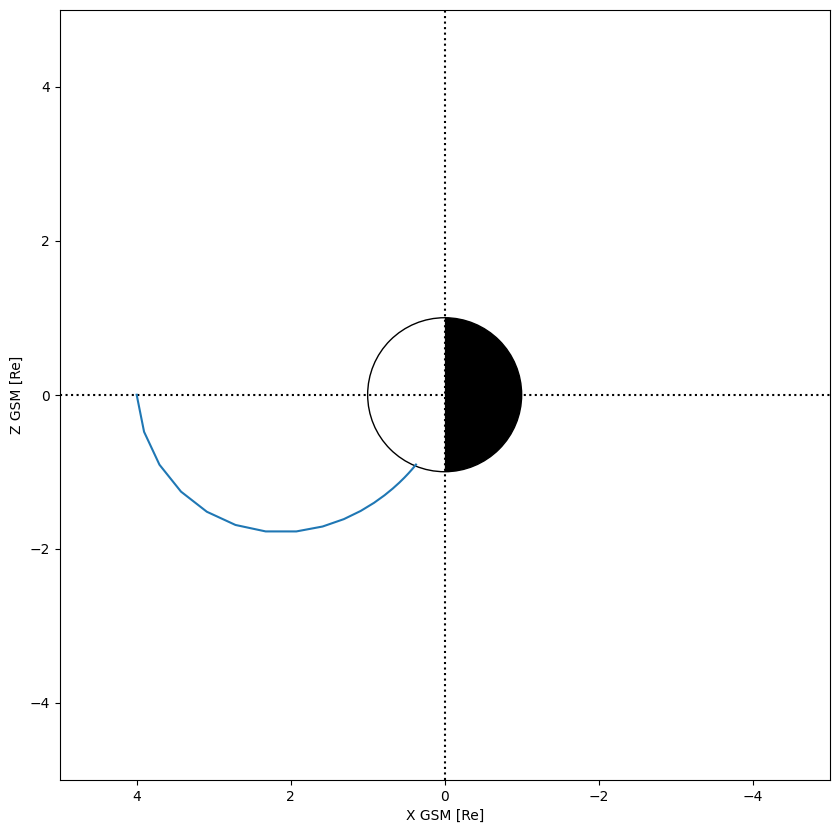

In [4]:
ax = setup_fig(xlim=(5, -5), ylim=(-5, 5))
ax.plot(xx, zz)
plt.show()


In [9]:
import pytplot
import akebono
import xarray as xr

akebono.vlf_mca(['1990-2-11', '1990-2-12'], datatype='pwr')
akebono.orb(['1990-2-11', '1990-2-12'])
Etvar = pytplot.get_data('akb_mca_Emax_pwr', xarray=True)
Btvar = pytplot.get_data('akb_mca_Bmax_pwr', xarray=True)
geo = pytplot.get_data('akb_orb_geo', xarray=True)


23-Aug-23 14:51:54: Local file: ../akebono_data/vlf/mca/h1/ave8s/1990/ak_h1_mca_19900211_v02.cdf exists.
23-Aug-23 14:51:55: File is current: ../akebono_data/orbit/daily/199002/ED900211.txt


In [10]:
Etvar


<xarray.DataArray 'akb_mca_Emax_pwr' (time: 10800, v_dim: 16)>
array([[2.51188643e+13, 2.51188643e+13, 2.51188643e+13, ...,
        2.51188643e+13, 2.51188643e+13, 2.51188643e+13],
       [2.51188643e+13, 2.51188643e+13, 2.51188643e+13, ...,
        2.51188643e+13, 2.51188643e+13, 2.51188643e+13],
       [2.51188643e+13, 2.51188643e+13, 2.51188643e+13, ...,
        2.51188643e+13, 2.51188643e+13, 2.51188643e+13],
       ...,
       [2.51188643e+13, 2.51188643e+13, 2.51188643e+13, ...,
        2.51188643e+13, 2.51188643e+13, 2.51188643e+13],
       [2.51188643e+13, 2.51188643e+13, 2.51188643e+13, ...,
        2.51188643e+13, 2.51188643e+13, 2.51188643e+13],
       [1.00000000e-12, 1.00000000e-12, 1.00000000e-12, ...,
        1.00000000e-12, 1.00000000e-12, 1.00000000e-12]])
Coordinates:
  * time       (time) datetime64[ns] 1990-02-11T00:00:04 ... 1990-02-11T23:59:56
    spec_bins  (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
    v          (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Dimensions without coordinates: v_dim
Attributes:
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [11]:
geo


<xarray.DataArray 'akb_orb_geo' (time: 2880, v_dim: 3)>
array([[-0.79602002,  0.96337851, -0.7743521 ],
       [-0.78619635,  0.93686935, -0.79238203],
       [-0.77602127,  0.90993976, -0.81005585],
       ...,
       [-0.59130428,  0.50074046, -1.00338385],
       [-0.57572948,  0.46786678, -1.01353539],
       [-0.55975464,  0.43466836, -1.02297942]])
Coordinates:
  * time     (time) datetime64[ns] 1990-02-11 ... 1990-02-11T23:59:30
Dimensions without coordinates: v_dim
Attributes:
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [13]:
dataset = xr.merge([Etvar, Btvar])


In [1]:
len([[1, 2],[2, 3]])


2

In [3]:
import numpy as np

np.tan(np.pi/2)


1.633123935319537e+16

In [1]:
import akebono

akebono.pws(trange=['1990-2-11', '1990-2-12'], datatype='ne')


10-Jun-23 15:49:27: Downloading remote index: http://darts.isas.jaxa.jp/stp/data/exosd/pws/NPW-DS/1990/
10-Jun-23 15:49:35: Downloading http://darts.isas.jaxa.jp/stp/data/exosd/pws/NPW-DS/1990/ak_h1_pws_19900211_v01.cdf to ../akebono_data/pws/NPW-DS/1990/ak_h1_pws_19900211_v01.cdf
10-Jun-23 15:49:36: Download complete: ../akebono_data/pws/NPW-DS/1990/ak_h1_pws_19900211_v01.cdf


['akb_pws_Mode', 'akb_pws_Gain', 'akb_pws_RX1', 'akb_pws_RX2']

compair mca h1 data

In [71]:
import cdflib
created_h1_data = cdflib.CDF('/home/onosawa/Document/Make_mca_cdf/onosawa/CDF-H1/1990/ak_h1_mca_19900202_v02.cdf')
existing_h1_data = cdflib.CDF('/home/onosawa/Document/Akebono_analysis/VLF_mca/Akebono_MCA_data/ak_h1_mca_19900202_v02.cdf')

epoch = created_h1_data.varget('Epoch')
cdflib.cdfepoch.breakdown(epoch)


[[1990, 2, 2, 0, 0, 4, 0],
 [1990, 2, 2, 0, 0, 12, 0],
 [1990, 2, 2, 0, 0, 20, 0],
 [1990, 2, 2, 0, 0, 28, 0],
 [1990, 2, 2, 0, 0, 36, 0],
 [1990, 2, 2, 0, 0, 44, 0],
 [1990, 2, 2, 0, 0, 52, 0],
 [1990, 2, 2, 0, 1, 0, 0],
 [1990, 2, 2, 0, 1, 8, 0],
 [1990, 2, 2, 0, 1, 16, 0],
 [1990, 2, 2, 0, 1, 24, 0],
 [1990, 2, 2, 0, 1, 32, 0],
 [1990, 2, 2, 0, 1, 40, 0],
 [1990, 2, 2, 0, 1, 48, 0],
 [1990, 2, 2, 0, 1, 56, 0],
 [1990, 2, 2, 0, 2, 4, 0],
 [1990, 2, 2, 0, 2, 12, 0],
 [1990, 2, 2, 0, 2, 20, 0],
 [1990, 2, 2, 0, 2, 28, 0],
 [1990, 2, 2, 0, 2, 36, 0],
 [1990, 2, 2, 0, 2, 44, 0],
 [1990, 2, 2, 0, 2, 52, 0],
 [1990, 2, 2, 0, 3, 0, 0],
 [1990, 2, 2, 0, 3, 8, 0],
 [1990, 2, 2, 0, 3, 16, 0],
 [1990, 2, 2, 0, 3, 24, 0],
 [1990, 2, 2, 0, 3, 32, 0],
 [1990, 2, 2, 0, 3, 40, 0],
 [1990, 2, 2, 0, 3, 48, 0],
 [1990, 2, 2, 0, 3, 56, 0],
 [1990, 2, 2, 0, 4, 4, 0],
 [1990, 2, 2, 0, 4, 12, 0],
 [1990, 2, 2, 0, 4, 20, 0],
 [1990, 2, 2, 0, 4, 28, 0],
 [1990, 2, 2, 0, 4, 36, 0],
 [1990, 2, 2, 0, 4, 44, 0],

In [62]:
existing_h1_data


<xarray.Dataset>
Dimensions:  (Epoch: 10800, channel: 16)
Coordinates:
  * Epoch    (Epoch) float64 6.28e+13 6.28e+13 6.28e+13 ... 6.28e+13 6.28e+13
  * channel  (channel) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Data variables:
    Emax     (Epoch, channel) uint8 87 84 84 80 85 76 73 ... 85 83 81 71 65 60
    Eave     (Epoch, channel) uint8 89 84 83 79 85 76 72 ... 82 80 73 66 60 51
    Bmax     (Epoch, channel) uint8 139 135 118 119 122 120 ... 90 82 85 81 78
    Bave     (Epoch, channel) uint8 140 133 126 121 122 122 ... 85 77 73 70 69
    PostGap  (Epoch) uint32 0 0 0 0 0 0 0 0 0 0 0 ... 32 32 0 0 0 0 32 32 0 0 2
Attributes: (12/24)
    Acknowledgement:             AKEBONO VLF-MCA data were provided by Akebon...
    ADID_ref:                    NSSD0241 
    Data_type:                   H1 > High Resolution data
    Data_version:                2
    Descriptor:                  MCA > multi channel analyzer
    Discipline:                  Space Physics > Magnetospheric Science
    ...                          ...
    source_name:                 Akebono > Akebono satellite
    TEXT:                        Kimura, I., K. Hashimoto, I. Nagano, T. Okad...
    Time_resolution:             8s
    TITLE:                       Akebono MCA High resolution data
    Start_time:                  1990_02/02_0:0:0:0
    End_time:                    1990_02/02_23:59:59:999

In [73]:
import cdflib

date = '0202'
cdf_name = '/home/onosawa/Downloads/onosawa/CDF-H0/1990/ak_h0_mca_19900202_v01.cdf'
cdf_file = cdflib.CDF(cdf_name)
epoch = cdf_file.varget('Epoch')
cdflib.cdfepoch.breakdown(epoch)


[[-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 0, 146],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 0, 646],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 1, 146],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 1, 646],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 2, 146],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 2, 646],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 3, 146],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 3, 646],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 4, 146],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 4, 646],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 5, 146],
 [-4713, 11, -9223372036854775784, 16, 4, 52, 344],
 [1990, 2, 2, 0, 0, 5, 646],
 [-4713, 11, -92233720368547

In [60]:
import pyspedas
epoch = x_array['Epoch'].values
pyspedas.time_string(epoch[1])


ValueError: year 1992058 is out of range

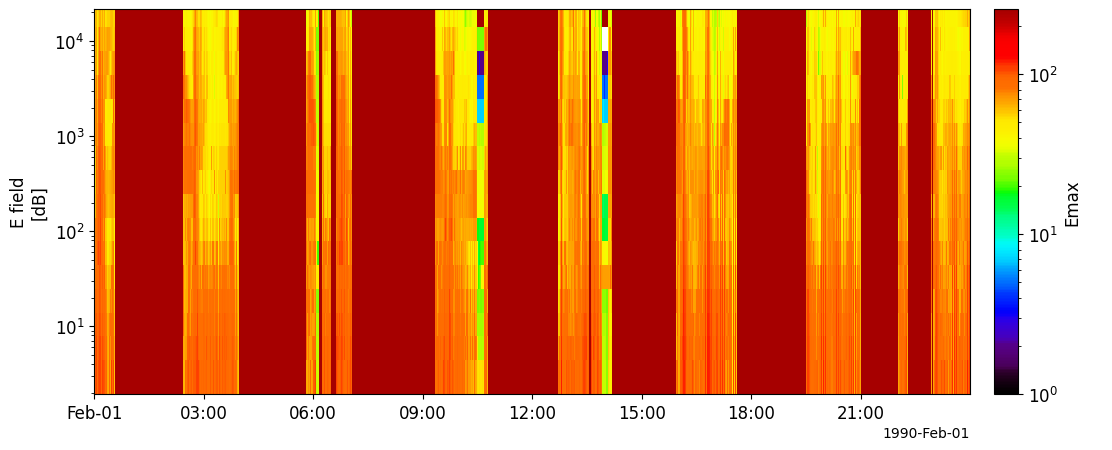

In [39]:
import pytplot
start_time = '1990'+date+' 00:00:00'
end_time = '1990'+date+' 23:59:00'
pytplot.cdf_to_tplot('/home/onosawa/Document/Akebono_analysis/VLF_mca/Akebono_MCA_data/ak_h1_mca_19900201_v02.cdf')
pytplot.options(name='Emax', opt_dict={'spec':1, 'ylog':1, 'zlog':1})
pytplot.tlimit(['19900201 00:00:00', '19900201 23:59:59'])
pytplot.tplot('Emax')


In [24]:
import cdflib

date = '0206'
cdf_name = '/home/onosawa/Document/Make_mca_cdf/onosawa/CDF-H1_test/1990/ak_h1_mca_1990'+date+'_v02.cdf'
x_array = cdflib.cdf_to_xarray(cdf_name)
x_array


ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Emax, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Eave, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Bmax, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Bave, but the dimensions do not match.


<xarray.Dataset>
Dimensions:  (record0: 10760, channel: 16, Epoch: 10800)
Coordinates:
  * Epoch    (Epoch) float64 6.28e+13 6.28e+13 6.28e+13 ... 6.28e+13 6.28e+13
  * channel  (channel) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Dimensions without coordinates: record0
Data variables:
    Emax     (record0, channel) uint8 55 56 59 59 56 56 43 ... 52 65 44 44 53 48
    Eave     (record0, channel) uint8 58 56 57 54 49 46 41 ... 48 61 39 40 51 46
    Bmax     (record0, channel) uint8 120 114 113 117 111 104 ... 90 81 77 77 77
    Bave     (record0, channel) uint8 122 114 110 109 112 104 ... 86 75 71 71 71
    PostGap  (Epoch) uint32 0 0 0 0 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/24)
    Acknowledgement:             AKEBONO VLF-MCA data were provided by Akebon...
    ADID_ref:                    NSSD0241 
    Data_type:                   H1 > High Resolution data
    Data_version:                2
    Descriptor:                  MCA > multi channel analyzer
    Discipline:                  Space Physics > Magnetospheric Science
    ...                          ...
    source_name:                 Akebono > Akebono satellite
    TEXT:                        Kimura, I., K. Hashimoto, I. Nagano, T. Okad...
    Time_resolution:             8s
    TITLE:                       Akebono MCA High resolution data
    Start_time:                  1990_02/06_0:0:0:0
    End_time:                    1990_02/06_23:59:59:999

In [23]:
24*3600/8


10800.0

<ipython-input-6-5648d1c6ded6>:56: RuntimeWarning: invalid value encountered in sqrt
  k1 = w/c*np.sqrt(n1)


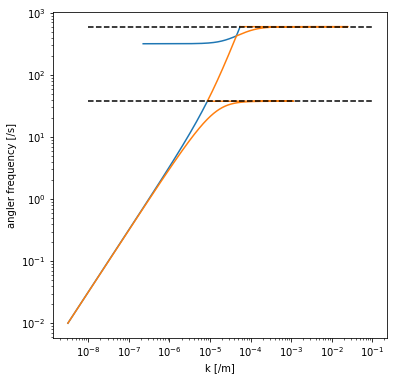

In [6]:
import numpy as np
import matplotlib.pyplot as plt

ne = 225e6
nh = 0.5*ne
nhe = 0*ne
no = 0.5*ne
q = 1.6e-19
eps = 8.9e-12
myu = 1.3e-6

me = 9.1e-31
mh = 1.7e-27
mhe = 6.7e-27
mo = 2.7e-26
rho = mo*no + mh*nh + mhe*nhe
c = 3e+8

pi_e = (ne*q**2/(eps*me))**0.5
pi_h = (nh*q**2/(eps*mh))**0.5
pi_he = (nhe*q**2/(eps*mhe))**0.5
pi_o = (no*q**2/(eps*mo))**0.5

omega_o = 2*np.pi*6
B0 = omega_o*mo/q
omega_e = -q*B0/me
omega_h = q*B0/mh
omega_he = q*B0/mhe

def dispersion(theta, w):

    Xe = (pi_e/w)**2
    Xh = (pi_h/w)**2
    Xhe = (pi_he/w)**2
    Xo = (pi_o/w)**2
    Ye = omega_e/w
    Yh = omega_h/w
    Yhe = omega_he/w
    Yo = omega_o/w

    R = 1 - Xe/(1 + Ye) - Xh/(1 + Yh) - Xhe/(1 + Yhe) - Xo/(1 + Yo)
    L = 1 - Xe/(1 - Ye) - Xh/(1 - Yh) - Xhe/(1 - Yhe) - Xo/(1 - Yo)

    S = (R + L)*0.5
    D = (R - L)*0.5
    P = 1 - Xe - Xh - Xhe - Xo

    A = S*(np.sin(theta))**2 + P*(np.cos(theta))**2
    B = R*L*(np.sin(theta))**2 + P*S*(1+(np.cos(theta))**2)
    C = P*R*L
    F = np.sqrt(B**2 - 4*A*C)

    n1 = (B + F)/(2*A)
    n2 = (B - F)/(2*A)

    k1 = w/c*np.sqrt(n1)
    k2 = w/c*np.sqrt(n2)

    return k1, k2

w = np.arange(0.01, omega_h + 0.001*omega_h, 0.00001*omega_h)
k1, k2 = dispersion(np.deg2rad(0), w)

fig = plt.figure(figsize=[6, 6])
ax1 = fig.add_subplot(111)
ax1.plot(k1, w)
ax1.plot(k2, w)
ax1.set_xlabel('k [/m]')
ax1.set_ylabel('angler frequency [/s]')
ax1.hlines(omega_o, xmin=1e-8, xmax=1e-1, colors='k', linestyles='dashed')
ax1.hlines(omega_h, xmin=1e-8, xmax=1e-1, colors='k', linestyles='dashed')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.show()


In [1]:
import numpy as np
freq_array = np.array([17800, 10000, 5620, 3160,
                       1780, 1000, 562, 316,
                       178])

peak_dB = np.array([[44, 69, 94],[46, 71, 96],[49,74,99],[51,76,101], [53,78,103], [54,80,105],
                    [56,81,5.90e-7],[58,83,1.71e-6],[61,85, 0]])

print(10**(peak_dB[0]/10 -12)/(freq_array[0]*0.3))


[4.70390718e-12 1.48750606e-09 4.70390718e-07]


In [12]:
plt.rcParams


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

Quick Look of MCA

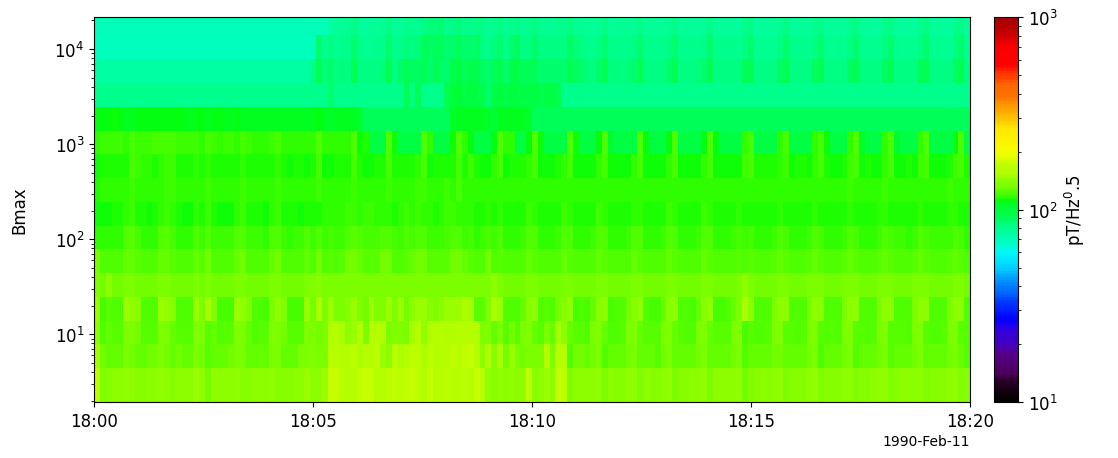

In [5]:
import load,pytplot
from datetime import datetime, timedelta

def next_day(date_string):
    date_format = '%Y-%m-%d'
    date = datetime.strptime(date_string, date_format)
    next_date = date + timedelta(days=1)
    return next_date.strftime(date_format)

date = '1990-02-17'
load.mca(trange=[date, next_day(date)], spec_type='amp')

pytplot.tlimit([date + ' 3:45:00', date + ' 3:55:00'])
pytplot.tplot(['Emax_amp', 'Bmax_amp'])


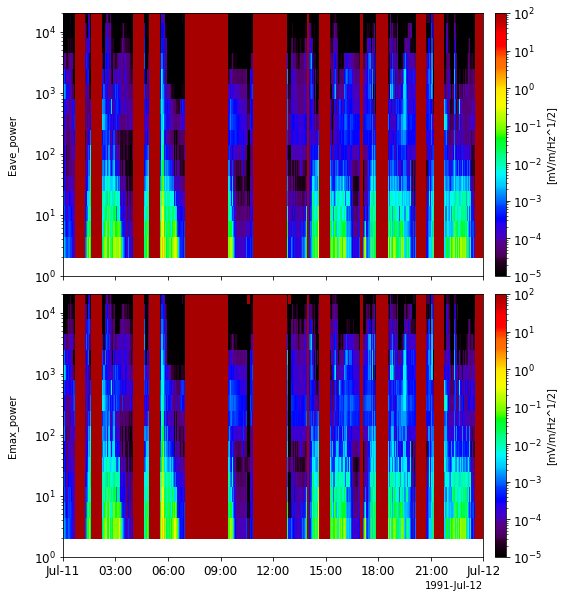

In [9]:
options(['Eave_power', 'Emax_power'], 'spec', 1)
options(['Eave_power', 'Emax_power'], 'ylog', 1)
options(['Eave_power', 'Emax_power'], 'zlog', 1)
options(['Eave_power', 'Emax_power'], 'zrange', [1e-5, 100])
options(['Eave_power', 'Emax_power'], 'yrange', [1, 2e4])
options(['Eave_power', 'Emax_power'], 'ztitle', '[mV/m/Hz^1/2]')
pytplot.tplot(['Eave_power', 'Emax_power'])


07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <ipython-input-40-09691759de28>:28: DeprecationWarning: invalid escape sequence \s
  plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')



Text(0, 0.5, '')

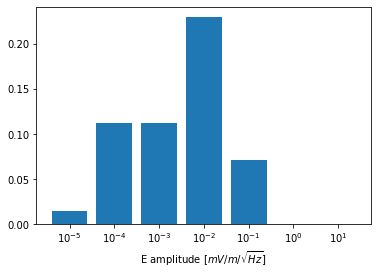

In [40]:
Emax = pytplot.get_data('Emax_amplitude')
Emax_T = Emax.y.T
Emax_1ch = Emax_T[0]
Emax_25dB = (10**(253/20)) * (1e-6)  / np.sqrt(3.16*0.3)

left = np.arange(7)
Emax_amp_0 = Emax_1ch.size
Emax_amp_1 = Emax_1ch[Emax_1ch < 1e1].size
Emax_amp_2 = Emax_1ch[Emax_1ch < 1].size
Emax_amp_3 = Emax_1ch[Emax_1ch < 1e-1].size
Emax_amp_4 = Emax_1ch[Emax_1ch < 1e-2].size
Emax_amp_5 = Emax_1ch[Emax_1ch < 1e-3].size
Emax_amp_6 = Emax_1ch[Emax_1ch < 1e-4].size
Emax_amp_25dB = Emax_1ch[Emax_1ch > Emax_25dB].size
Emax_seconds = np.array([Emax_amp_6/Emax_amp_0,
               (Emax_amp_5-Emax_amp_6)/Emax_amp_0,
               (Emax_amp_4-Emax_amp_5)/Emax_amp_0,
               (Emax_amp_3-Emax_amp_4)/Emax_amp_0,
               (Emax_amp_2-Emax_amp_3)/Emax_amp_0,
               (Emax_amp_1-Emax_amp_2)/Emax_amp_0,
               (Emax_amp_0-Emax_amp_1-Emax_amp_25dB)/Emax_amp_0])


import matplotlib.pyplot as plt
labels = ['$10^{-5}$', '$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^0$','$10^1$']
plt.figure()
plt.bar(left, Emax_seconds, tick_label = labels)
plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')
plt.ylabel('')


In [15]:
trange = ['2000-01-01 00:00:00', '2000-01-02 00:00:00']
with open('/Document/Akebono_analysis/VLF_mca/akebono_orbit_error_day_list.txt', mode="a") as f:
    f.write(trange[0] + '\n')


In [22]:
import pyspedas
import pytplot
from pytplot import options, tplot, tlimit, tplot_options, get_data, store_data
import numpy as np
from load import mca, orb

ILAT_min = 55
start_day_string = '1990-01-01'
start_day_time_double = pyspedas.time_double(start_day_string)
seconds_per_day = 86400
day_list = []
for i in range(0, 10):
    time_double = start_day_time_double + i * seconds_per_day
    day_list.append(pyspedas.time_string(time_double, fmt='%Y-%m-%d %H:%M:%S'))

for k in range(len(day_list)-1):

    trange = [day_list[k], day_list[k+1]]
    print(trange)

    mca(trange= trange)
    try:
        orb(trange= trange)
    except:
        with open('/Document/Akebono_analysis/VLF_mca/akebono_orbit_error_day_list.txt', mode="a") as f:
                f.write(trange[0] + '\n')
        print('orbit file does not exists')
        continue
    print('orbit file exists')


['1990-01-01 00:00:00', '1990-01-02 00:00:00']
orbit file exists
['1990-01-02 00:00:00', '1990-01-03 00:00:00']
orbit file does not exists
['1990-01-03 00:00:00', '1990-01-04 00:00:00']
orbit file exists
['1990-01-04 00:00:00', '1990-01-05 00:00:00']
orbit file exists
['1990-01-05 00:00:00', '1990-01-06 00:00:00']
orbit file exists
['1990-01-06 00:00:00', '1990-01-07 00:00:00']
orbit file exists
['1990-01-07 00:00:00', '1990-01-08 00:00:00']
orbit file exists
['1990-01-08 00:00:00', '1990-01-09 00:00:00']
orbit file exists
['1990-01-09 00:00:00', '1990-01-10 00:00:00']
orbit file exists


In [42]:
import load
trange = ['2003-01-01', '2006-01-01']
load.mca(trange, downloadonly =True)


In [ ]:
trange = ['2006-01-01', '2009-01-01']
load.mca(trange, downloadonly =True)


In [11]:
load.orb(trange, downloadonly=True)


HTTPError: HTTP Error 404: Not Found

In [12]:
load.mca(trange, downloadonly =True)


In [4]:
import pytplot
tplot_names = pytplot.tplot_names(True)
pytplot.store_data(tplot_names, delete=True)
print(pytplot.tplot_names())


[]


akebono_mca_plot.py実行時に現れる以下のエラーについて。\
Traceback (most recent call last):
  File "akebono_mca_plot.py", line 266, in <module>
    tplot(['IMF', 'flow_speed', 'proton_density', 'Pressure', 'E','Bmax_' + surfix, 'Emax_' + surfix, 'Emax_lines_' + surfix, 'SYM_H'], 
  File "/home/www/.local/lib/python3.8/site-packages/pytplot/tplot.py", line 159, in tplot
    return mpl_tplot(name, var_label=var_label,
  File "/home/www/.local/lib/python3.8/site-packages/pytplot/MPLPlotter/tplot.py", line 233, in tplot
    if not np.isfinite(yrange[0]):
TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


原因
omniデータのtplot変数でyの値がすべて有限数ではない値になっているものをプロットしようとしたため。


Gyro frequency plot on spectrogram plot

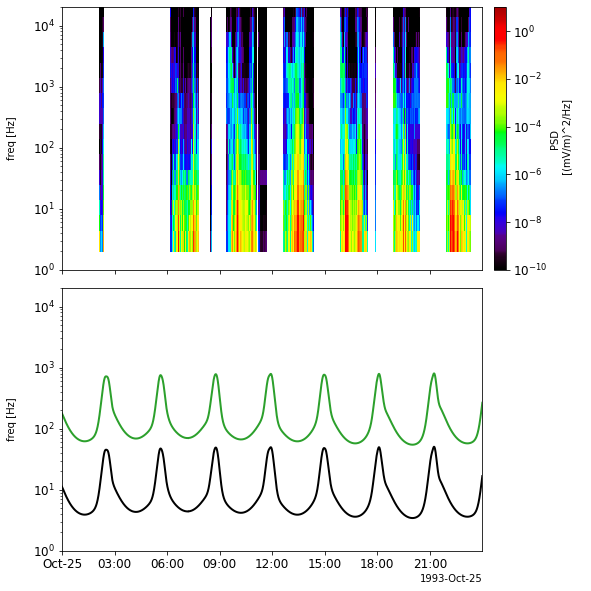

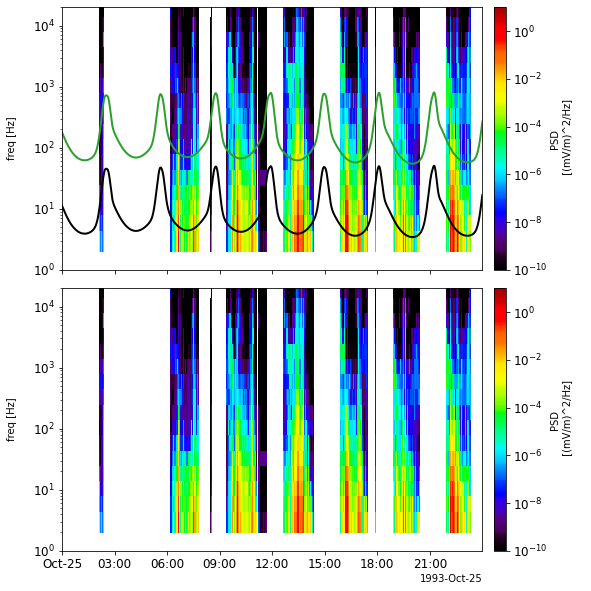

In [7]:
from load import orb, mca
import pytplot
import numpy as np
trange = ['1993-10-25', '1993-10-26']
mca(trange)
orb(trange)

tplot_name = ['Emax', 'Eave', 'Bmax', 'Bave']
for k in range(4):
    tplot_variable = pytplot.get_data(tplot_name[k])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
    tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)  / bandwidth
    pytplot.store_data(tplot_name[k] +'_amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
    pytplot.store_data(tplot_name[k] +'_pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

pytplot.options('Emax_pwr', 'spec', 1)
pytplot.options('Emax_pwr', 'ylog', 1)
pytplot.options('Emax_pwr', 'zlog', 1)
pytplot.options('Emax_pwr', 'ztitle', 'PSD \n [(mV/m)^2/Hz]')
pytplot.options('Emax_pwr', 'ytitle', 'freq [Hz]')
pytplot.options('Emax_pwr', 'yrange', [1, 2e4])
pytplot.options('Emax_pwr', 'zrange', [1e-10, 10])


Bx = pytplot.get_data('akb_Bmdl_X')
By = pytplot.get_data('akb_Bmdl_Y')
Bz = pytplot.get_data('akb_Bmdl_Z')
B = np.sqrt(Bx.y**2 + By.y**2 + Bz.y**2) * 1e-9

mass_o = 2.656e-26
mass_h = 1.67e-27
q = 1.60217663e-19

O_gyro = q*B/mass_o/(2*np.pi)
H_gyro = q*B/mass_h/(2*np.pi)
gyro_matrix = np.array([O_gyro, H_gyro]).T
pytplot.store_data('gyro_freq', data = {'x': Bx.times, 'y':gyro_matrix})
pytplot.options('gyro_freq', 'ylog', 1)
pytplot.options('gyro_freq', 'yrange', [1, 2e4])
pytplot.options('gyro_freq', 'ytitle', 'freq [Hz]')
pytplot.options('gyro_freq', 'thick', 2)

pytplot.options('gyro_freq', 'legend_location', 'spedas')

pytplot.store_data('Emax_pwr-w-gyro_freq', data = 'Emax_pwr gyro_freq')
pytplot.tlimit(['1993-10-25 00:00:00', '1993-10-25 23:59:59'])
from pytplot import tplot_options

tplot_options('xmargin', [0.1, 0.25])
pytplot.tplot(['Emax_pwr', 'gyro_freq'])
pytplot.tplot(['Emax_pwr-w-gyro_freq', 'Emax_pwr'])


二つ目にくっつけたtplot変数のyrange, ytitleが適応される

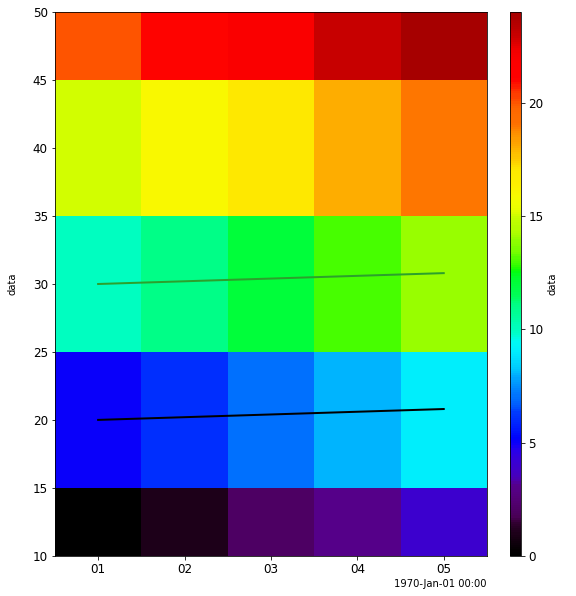

In [64]:
import numpy as np
from pytplot import store_data, options, tplot, tplot_names
data = np.array([[0,       1,       2,       3,       4],
           [5,       6,       7,       8,       9],
          [10,      11,      12,      13,      14],
          [15,      16,      17,      18,      19],
          [20,      21,      22,      23,      24]])
store_data('data', data={'x': [1, 2, 3, 4, 5], 'y': data.transpose(), 'v': [10, 20, 30, 40, 50]})
options('data', 'spec', True)
import numpy as np
store_data('lines', data={'x':[1, 2, 3, 4, 5],'y':np.array([[20, 20.2, 20.4, 20.6, 20.8], [30, 30.2, 30.4, 30.6, 30.8]]).T})
#options('lines', 'legend_names', ['Line1', 'Line2'])
options('lines', 'Colormap', 'k')
options('lines', 'thick', 2)
options('lines', 'yrange', [10, 50])
options('lines', 'ytitle', 'data')

store_data('spec_w_lines', data='data lines')

tplot('spec_w_lines')


観測高度の最大最小値の探索

In [19]:
import pyspedas
import pytplot
from pytplot import options, tplot, tlimit, tplot_options, get_data, store_data
import numpy as np
from load import mca, orb

Alt_max = 0
Alt_min = 10000

start_day_string = '1990-01-01'
start_day_time_double = pyspedas.time_double(start_day_string)

seconds_per_day = 86400
day_list = []
for i in range(0, 185):
    time_double = start_day_time_double + i * seconds_per_day
    day_list.append(pyspedas.time_string(time_double, fmt='%Y-%m-%d %H:%M:%S'))

for k in range(len(day_list)-1):

    trange = [day_list[k], day_list[k+1]]
    print(trange)
    try:
        mca(trange= trange)
    except Exception as e:
        print(e)
        continue
    try:
        orb(trange= trange)
    except Exception as e:
        print(e)
        #with open('./akebono_orbit_error_day_list.txt', mode="a") as f:
        #       f.write(trange[0] + '\n')

        #print('orbit file does not exists')
        continue
    try:
        pyspedas.tinterpol('akb_ILAT', interp_to='Emax', newname = 'ILAT')
    except:
        with open('./akebono_orbit_error_day_list.txt', mode="a") as f:
                f.write(trange[0] + '\n')
        print('orbit file is not perfect')
        continue

    tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
    for i in range(4):
        tplot_variable = pytplot.get_data(tplot_names[i])
        tplot_variable_float = (tplot_variable.y).astype(float)
        np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
        tplot_variable_0dB = 1e-6 #mV or pT
        bandwidth = tplot_variable.v * 0.3
        tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
        tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)
        pytplot.store_data(tplot_names[i] +'_Amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
        pytplot.store_data(tplot_names[i] +'_Pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

    pyspedas.tinterpol('akb_Pass', interp_to='Emax', newname = 'Pass', method = 'nearest')
    pyspedas.tinterpol('akb_ALT', interp_to='Emax', newname = 'ALT')
    pyspedas.tinterpol('akb_MLT', interp_to='Emax', newname = 'MLT', method = 'nearest')

    ILAT = get_data('ILAT')
    MLT = get_data('MLT')
    ALT = get_data('ALT')
    Emax_pwr = get_data('Emax_Pwr')
    Emax_pwr_10Hz = Emax_pwr.y.T[2]
    cusp_index_tuple = np.where((Emax_pwr_10Hz > 0.1)&(ILAT.y > 55)&(MLT.y > 10)&(MLT.y < 14))
    cusp_index = cusp_index_tuple[0]
    if len(cusp_index) == 0:
        continue
    Alt_max_day = np.nanmax(ALT.y[cusp_index])
    Alt_min_day = np.nanmin(ALT.y[cusp_index])
    if Alt_max_day > Alt_max:
        Alt_max = Alt_max_day
        print(Alt_max)
    if Alt_min_day < Alt_min:
        Alt_min = Alt_min_day
        print(Alt_min)


['1990-01-01 00:00:00', '1990-01-02 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-02 00:00:00', '1990-01-03 00:00:00']
HTTP Error 404: Not Found
['1990-01-03 00:00:00', '1990-01-04 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-04 00:00:00', '1990-01-05 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-05 00:00:00', '1990-01-06 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-06 00:00:00', '1990-01-07 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (n

In [20]:
print(Alt_min, Alt_max)


336.45733333333334 9931.985333333334


In [6]:
import numpy as np
a = np.array([0,0,0,0])
if sum(a[a == 1]) >0:
    print('pws on')
elif sum(a[a == 1]) == 0:
    print('pws off')


pws off


In [13]:
import numpy as np

a = np.arange(0, 5)
b = np.arange(2, 5)

index = np.where((a == 1) | (a == 2))
a, b , index


(array([0, 1, 2, 3, 4]), array([2, 3, 4]), (array([1, 2]),))

In [14]:
import load, pytplot, numpy
from pytplot import get_data
load.mca(['1990-04-01', '1990-04-02'], del_invalid_data=False)
Emax, Bmax, Eave, Bave = get_data('Emax'), get_data('Bmax'), get_data('Eave'), get_data('Bave')
Emax_array, Bmax_array, Eave_array, Bave_array = Emax.y.astype(float), Bmax.y.astype(float), Eave.y.astype(float), Bave.y.astype(float)
postgap = get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 8])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",             "BDR",               "SMS",               "Bit rate",          "PWS",               "3bit",              "4bit"
    postgap_array[i][0], postgap_array[i][1], postgap_array[i][2], postgap_array[i][3], postgap_array[i][4], postgap_array[i][5], postgap_array[i][6], postgap_array[i][7] = \
    int(postgap_str[7]), int(postgap_str[6]), int(postgap_str[3]), int(postgap_str[2]), int(postgap_str[1]), int(postgap_str[0]), int(postgap_str[4]), int(postgap_str[5]),
postgap_array = postgap_array.T

off_index = np.where(postgap_array[0] == 1)
noisy_index = np.where(postgap_array[1] == 1)
BDR_index = np.where(postgap_array[2] == 1)
SMS_index = np.where(postgap_array[3] == 1)
Bitrate_index = np.where(postgap_array[4] == 1)
PWS_index = np.where(postgap_array[5] == 1)

print(off_index[0])
print(noisy_index[0])
print(BDR_index[0])
print(SMS_index[0])
print(Bitrate_index[0])
print(PWS_index[0])
invalid_data_index = np.append(off_index[0], np.array(noisy_index[0], BDR_index[0], SMS_index[0], Bitrate_index[0], PWS_index[0]))
print(invalid_data_index)
#Emax_array[invalid_data_index] = np.nan


[    0     1     2 ... 10792 10793 10794]
[   99   324   332   398  3647  3653  3655  3938  3947  4006  4038  4093
  4095  4098  4110  4123  4172  4187  4205  4408  4432  4435  5251  5805
  5863  5864  5999  6127  6855  7071  7072  7073  7074  7563  7691  8712
  8716  8718  8719  8720  8721  8722  8723  8724  8725  8726  8727  8728
  8729  8958 10545 10546 10547 10548 10667 10795 10799]
[5999 9452 9453 9454 9455 9456 9457 9458 9459 9460 9461 9462 9463 9464
 9465 9466 9467 9468 9469 9470 9471 9472 9473 9474 9475 9476 9477 9478
 9479 9480 9481 9482 9483 9484 9485 9486 9487 9488 9489 9490 9491 9492
 9493 9494 9495 9496 9497 9498 9499 9500 9501 9502 9503 9504 9505 9506
 9507 9508 9509 9510 9511 9512 9513 9514 9515 9516 9517 9518]
[ 3728  3729  3730 ... 10614 10615 10616]
[]
[]


TypeError: array() takes from 1 to 2 positional arguments but 5 were given

In [1]:
import load, pytplot

load.mca(['1990-04-01', '1990-04-02'], del_invalid_data=True)
pytplot.options(['Emax','Bmax'], 'spec', True)
pytplot.options(['Emax','Bmax'], 'ylog', True)

pytplot.tlimit(['1990-04-01 08:55:00', '1990-04-01 9:00:00'])
pytplot.tplot(['Emax','Bmax', 'PostGap'])


17-Sep-22 18:03:33: /home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),

17-Sep-22 18:03:33: /home/www/Document/Akebono_analysis_test/Akebono_analysis/VLF_mca/load.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  invalid_data_index = np.append(off_index[0], np.array([noisy_index[0], BDR_index[0], SMS_index[0], Bitrate_index[0], PWS_index[0]]))



[0 1 2 ... array([ 3728,  3729,  3730, ..., 10614, 10615, 10616])
 array([], dtype=int64) array([], dtype=int64)]


IndexError: arrays used as indices must be of integer (or boolean) type

In [13]:
import pyspedas
import pytplot
from pytplot import options, tplot, tlimit, tplot_options, get_data, store_data
import numpy as np
from load import mca, orb

start_day_string = '1990-03-06'
start_day_time_double = pyspedas.time_double(start_day_string)

seconds_per_day = 86400
day_list = []
for i in range(0, 368):
    time_double = start_day_time_double + i * seconds_per_day
    day_list.append(pyspedas.time_string(time_double, fmt='%Y-%m-%d %H:%M:%S'))

for k in range(len(day_list)-1):

    trange = [day_list[k], day_list[k+1]]

    mca(trange= trange)
    try:
        orb(trange= trange)
    except:
        print('////////////error//////////////')
        print(trange)

    tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']

    #dB to amplitude
    for i in range(4):
        tplot_variable = pytplot.get_data(tplot_names[i])
        tplot_variable_float = (tplot_variable.y).astype(float)
        np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
        tplot_variable_0dB = 1e-6 #mV or pT
        bandwidth = tplot_variable.v * 0.3
        tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
        tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)  / bandwidth
        pytplot.store_data(tplot_names[i] +'_Amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
        pytplot.store_data(tplot_names[i] +'_Pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

    postgap = pytplot.get_data('PostGap')
    postgap_array = np.empty([postgap.y.size, 8])
    for i in range(postgap.y.size):
        postgap_str = format(postgap.y[i], '08b')
        postgap_array[i][3], postgap_array[i][1], postgap_array[i][2], postgap_array[i][0], postgap_array[i][4], postgap_array[i][5], postgap_array[i][6], postgap_array[i][7] = \
        int(postgap_str[2]), int(postgap_str[6]), int(postgap_str[3]), int(postgap_str[7]), int(postgap_str[1]), int(postgap_str[0]), int(postgap_str[4]), int(postgap_str[5]),
        #"off", "noisy", "BDR", "SMS", "Bit rate", "PWS", "3bit", '4bit'
    pws_array = postgap_array.T[5]

    if sum(pws_array[pws_array == 1]) >0:
        print('pws on')
        print(trange)
        break


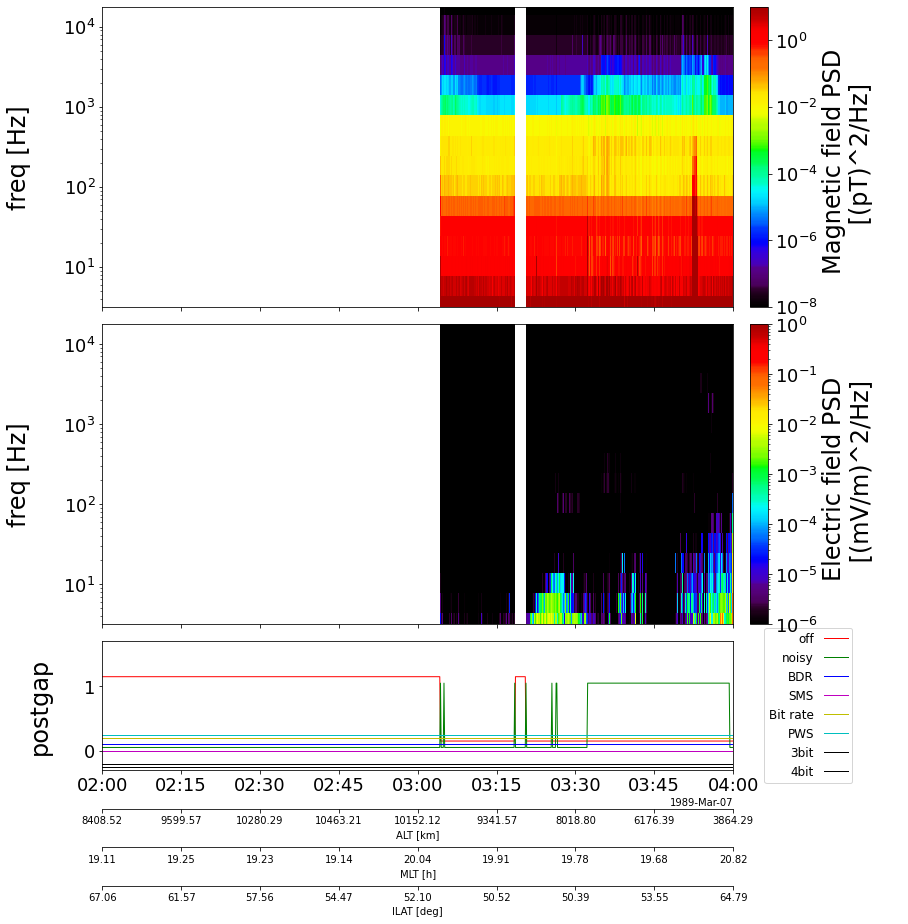

In [17]:
pytplot.tlimit([trange[0]+' 02:00:00', trange[0]+' 04:0:00'])
pytplot.tplot(['Bmax_pwr', 'Emax_pwr', 'postgap'], var_label= ['ALT', 'MLT', 'ILAT'], xsize = 12, ysize = 20)


In [8]:
from load import orb
orb(['1994-03-20', '1994-03-21'])
import pytplot
import pyspedas

ALT = pytplot.get_data('akb_ALT')
date_list =pyspedas.time_string(ALT.times)
ALT.y


array([2046.2,    nan,    nan, ...,    nan,    nan,    nan])

In [10]:
import pyspedas
import pandas as pd
import numpy as np

pyspedas.dpwrspc()

date_list = pd.date_range(start='1994-03-01', end='1994-04-01', freq='MS')
date_list = np.datetime_as_string(date_list, unit='D')
date_list = date_list.astype(object)
date_list


array(['1994-03-01', '1994-04-01'], dtype=object)

In [4]:
import pyspedas, pytplot, load
a = load.mca(['1990-02-01', '1990-02-02'], del_invalid_data=False)
pytplot.data_quants['Emax'].CDF['VATT']


TypeError: object of type 'bool' has no len()

In [29]:
bin(243)


'0b11110011'

In [26]:
import pyspedas
a = pyspedas.erg.mgf()
pytplot.data_quants['erg_mgf_l2_mag_8sec_dsi'].CDF['VATT']


05-Sep-22 17:26:59: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
05-Sep-22 17:26:59: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
05-Sep-22 17:26:59: /home/www/.local/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

05-Sep-22 17:26:59: /home/www/.local/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:258: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


{'FIELDNAM': 'B in DSI',
 'CATDESC': '8 sec resolution B in DSI coordinates',
 'VALIDMIN': '-99999.999',
 'VALIDMAX': '99999.999',
 'SCALEMIN': '-99999.999',
 'SCALEMAX': '99999.999',
 'UNITS': 'nT',
 'UNIT_PTR': 'unit_mag_8sec',
 'DEPEND_0': 'epoch_8sec',
 'LABLAXIS': 'B DSI',
 'LABL_PTR_1': 'label_mag_8sec',
 'MONOTON': 'false',
 'FORMAT': 'F10.3',
 'FILLVAL': '-1.0E+31',
 'VAR_TYPE': 'data',
 'AVG_TYPE': 'standard',
 'DISPLAY_TYPE': 'time_series',
 'SCALETYP': 'linear'}

Ishigaya2017 ion heating event中での低周波波動のドップラーシフトの見積もり 

In [ ]:
import numpy as np
Ne = np.array([60, 71, 128, 225, 173, 47])
fpe = 9*np.sqrt(Ne)
